In [65]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [66]:
ds=pd.read_csv('train.csv')           
dt=pd.read_csv('test.csv')

***FEATURES:***

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [67]:
ds.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [68]:
ds.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [69]:
ds.shape

(2000, 21)

In [70]:
ds.size

42000

In [71]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [72]:
ds['clock_speed'] = ds['clock_speed'].astype(int)
ds['m_dep'] = ds['m_dep'].astype(int)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   blue           2000 non-null   int64
 2   clock_speed    2000 non-null   int64
 3   dual_sim       2000 non-null   int64
 4   fc             2000 non-null   int64
 5   four_g         2000 non-null   int64
 6   int_memory     2000 non-null   int64
 7   m_dep          2000 non-null   int64
 8   mobile_wt      2000 non-null   int64
 9   n_cores        2000 non-null   int64
 10  pc             2000 non-null   int64
 11  px_height      2000 non-null   int64
 12  px_width       2000 non-null   int64
 13  ram            2000 non-null   int64
 14  sc_h           2000 non-null   int64
 15  sc_w           2000 non-null   int64
 16  talk_time      2000 non-null   int64
 17  three_g        2000 non-null   int64
 18  touch_screen   2000 non-null   int64
 19  wifi  

In [73]:
ds.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.0290,0.509500,4.309500,0.521500,32.046500,0.05300,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.8506,0.500035,4.341444,0.499662,18.145715,0.22409,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.0000,0.000000,0.000000,0.000000,2.000000,0.00000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.0000,0.000000,1.000000,0.000000,16.000000,0.00000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.0000,1.000000,3.000000,1.000000,32.000000,0.00000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.0000,1.000000,7.000000,1.000000,48.000000,0.00000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.0000,1.000000,19.000000,1.000000,64.000000,1.00000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [74]:
print(ds.isnull())
print(ds.isnull().sum())

      battery_power   blue  clock_speed  dual_sim     fc  four_g  int_memory  \
0             False  False        False     False  False   False       False   
1             False  False        False     False  False   False       False   
2             False  False        False     False  False   False       False   
3             False  False        False     False  False   False       False   
4             False  False        False     False  False   False       False   
...             ...    ...          ...       ...    ...     ...         ...   
1995          False  False        False     False  False   False       False   
1996          False  False        False     False  False   False       False   
1997          False  False        False     False  False   False       False   
1998          False  False        False     False  False   False       False   
1999          False  False        False     False  False   False       False   

      m_dep  mobile_wt  n_cores  ...  p

In [75]:
ds["Is_blue"]=''
for i in range(len(ds)):
  if ds["blue"][i]==0:
    ds.loc[i,"Is_blue"]="No"
  else:
    ds.loc[i,"Is_blue"]="Yes"
ds

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Is_blue
0,842,0,2,0,1,0,7,0,188,2,...,756,2549,9,7,19,0,0,1,1,No
1,1021,1,0,1,0,1,53,0,136,3,...,1988,2631,17,3,7,1,1,0,2,Yes
2,563,1,0,1,2,1,41,0,145,5,...,1716,2603,11,2,9,1,1,0,2,Yes
3,615,1,2,0,0,0,10,0,131,6,...,1786,2769,16,8,11,1,0,0,2,Yes
4,1821,1,1,0,13,1,44,0,141,2,...,1212,1411,8,2,15,1,1,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0,1,0,1,2,0,106,6,...,1890,668,13,4,19,1,1,0,0,Yes
1996,1965,1,2,1,0,0,39,0,187,4,...,1965,2032,11,10,16,1,1,1,2,Yes
1997,1911,0,0,1,1,1,36,0,108,8,...,1632,3057,9,1,5,1,1,0,3,No
1998,1512,0,0,0,4,1,46,0,145,5,...,670,869,18,10,19,1,1,1,0,No


In [76]:
px.histogram(data_frame=ds,x="Is_blue",color="price_range",title="Comparision of devices sold having bluetooth or not")

In [77]:
ds["Is_touch_screen"]=''
for i in range(len(ds)):
  if ds["touch_screen"][i]==0:
    ds.loc[i,"Is_touch_screen"]="No"
  else:
    ds.loc[i,"Is_touch_screen"]="Yes"
ds

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Is_blue,Is_touch_screen
0,842,0,2,0,1,0,7,0,188,2,...,2549,9,7,19,0,0,1,1,No,No
1,1021,1,0,1,0,1,53,0,136,3,...,2631,17,3,7,1,1,0,2,Yes,Yes
2,563,1,0,1,2,1,41,0,145,5,...,2603,11,2,9,1,1,0,2,Yes,Yes
3,615,1,2,0,0,0,10,0,131,6,...,2769,16,8,11,1,0,0,2,Yes,No
4,1821,1,1,0,13,1,44,0,141,2,...,1411,8,2,15,1,1,0,1,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0,1,0,1,2,0,106,6,...,668,13,4,19,1,1,0,0,Yes,Yes
1996,1965,1,2,1,0,0,39,0,187,4,...,2032,11,10,16,1,1,1,2,Yes,Yes
1997,1911,0,0,1,1,1,36,0,108,8,...,3057,9,1,5,1,1,0,3,No,Yes
1998,1512,0,0,0,4,1,46,0,145,5,...,869,18,10,19,1,1,1,0,No,Yes


In [78]:
px.histogram(data_frame=ds,x="Is_touch_screen",color="price_range",title="Comparision of devices sold having touch screen or not")

In [79]:
px.pie(data_frame=ds,names="Is_blue",title="Percentage of devices having bluetooth",hole=0.1)

In [80]:
px.pie(data_frame=ds,names="Is_touch_screen",title="Percentage of devices having touch screen",hole=0.1)

In [81]:
ds["Is_four_g"]=''
for i in range(len(ds)):
  if ds["four_g"][i]==0:
    ds.loc[i,"Is_four_g"]="No"
  else:
    ds.loc[i,"Is_four_g"]="Yes"
ds

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Is_blue,Is_touch_screen,Is_four_g
0,842,0,2,0,1,0,7,0,188,2,...,9,7,19,0,0,1,1,No,No,No
1,1021,1,0,1,0,1,53,0,136,3,...,17,3,7,1,1,0,2,Yes,Yes,Yes
2,563,1,0,1,2,1,41,0,145,5,...,11,2,9,1,1,0,2,Yes,Yes,Yes
3,615,1,2,0,0,0,10,0,131,6,...,16,8,11,1,0,0,2,Yes,No,No
4,1821,1,1,0,13,1,44,0,141,2,...,8,2,15,1,1,0,1,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0,1,0,1,2,0,106,6,...,13,4,19,1,1,0,0,Yes,Yes,Yes
1996,1965,1,2,1,0,0,39,0,187,4,...,11,10,16,1,1,1,2,Yes,Yes,No
1997,1911,0,0,1,1,1,36,0,108,8,...,9,1,5,1,1,0,3,No,Yes,Yes
1998,1512,0,0,0,4,1,46,0,145,5,...,18,10,19,1,1,1,0,No,Yes,Yes


In [82]:
px.histogram(data_frame=ds,x="Is_four_g",color="price_range",title="Comparision of devices sold having 4G or not")

In [83]:
px.pie(data_frame=ds,names="Is_four_g",title="Percentage of devices having 4G",hole=0.1)

In [84]:
ds["cores"]=''
for i in range(len(ds)):
  if(ds["n_cores"][i]==1):
    ds.loc[i,"cores"]="Single core"
  elif(ds["n_cores"][i]==2):
    ds.loc[i,"cores"]="Dual core"
  elif(ds["n_cores"][i]==3):
    ds.loc[i,"cores"]="Triple core"
  elif(ds["n_cores"][i]==4):
    ds.loc[i,"cores"]="Quad core"
  elif(ds["n_cores"][i]==5):
    ds.loc[i,"cores"]="Penta core"
  elif(ds["n_cores"][i]==6):
    ds.loc[i,"cores"]="Hexa core"
  elif(ds["n_cores"][i]==7):
    ds.loc[i,"cores"]="Hepta core"
  else:
    ds.loc[i,"cores"]="Octal core"
px.pie(data_frame=ds,names="cores",hole=0.1,title="Percentage of devices having different types of cores")

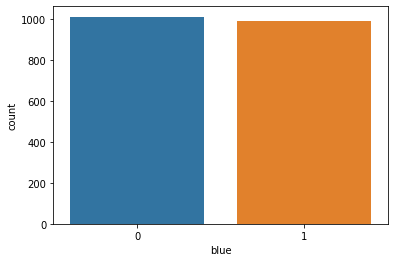

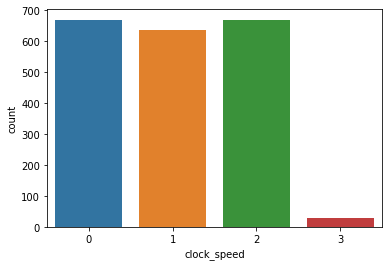

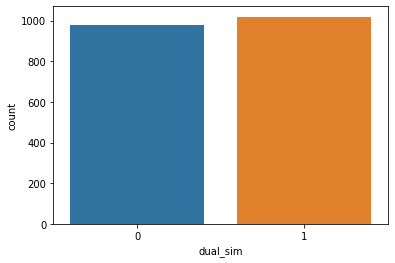

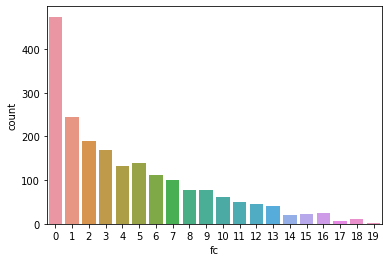

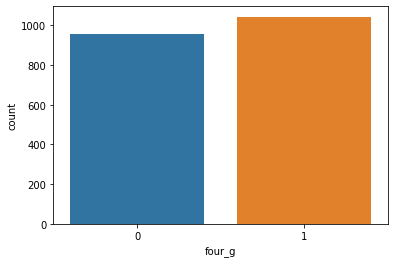

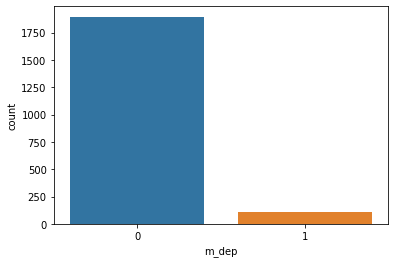

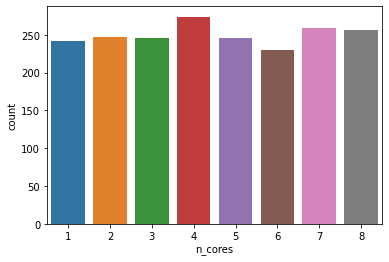

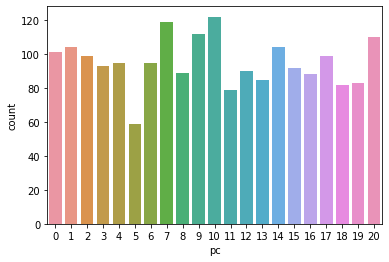

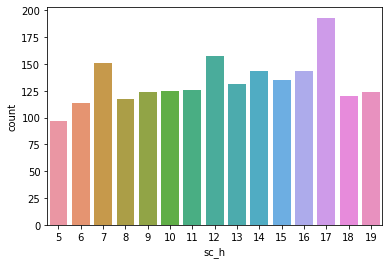

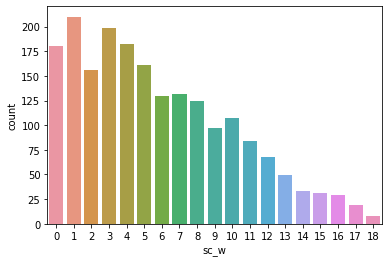

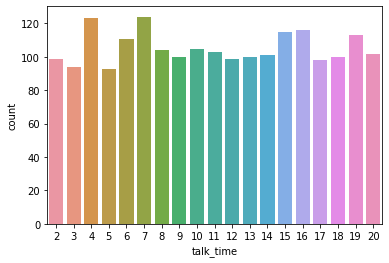

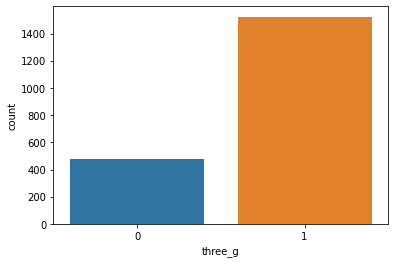

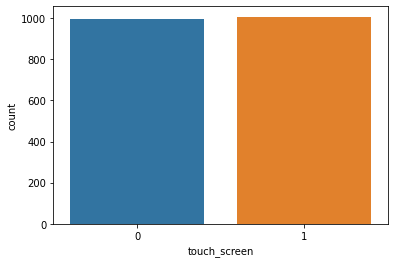

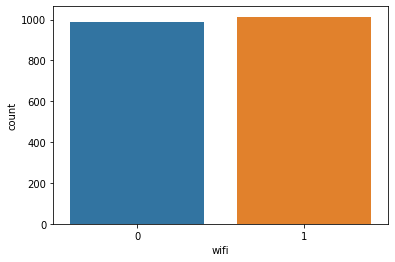

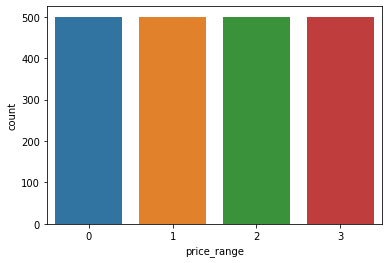

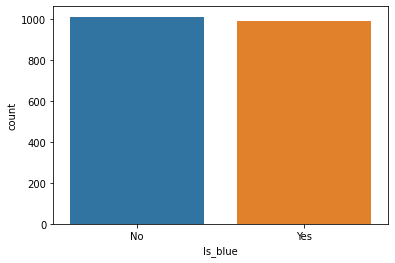

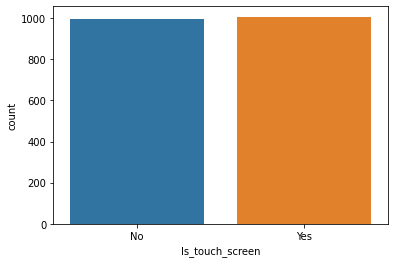

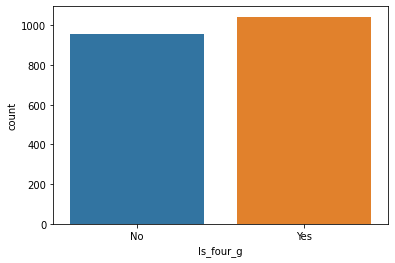

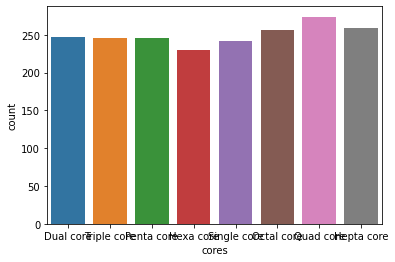

In [85]:
for i in ds:
  if(ds[i].nunique()<30):
    sns.countplot(x=ds[i])
    plt.show()

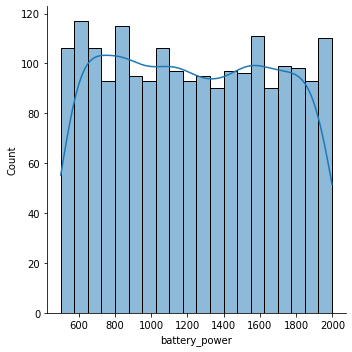

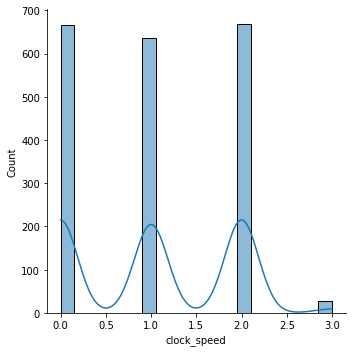

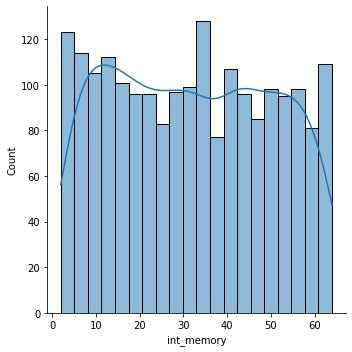

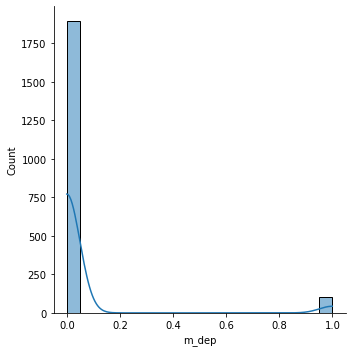

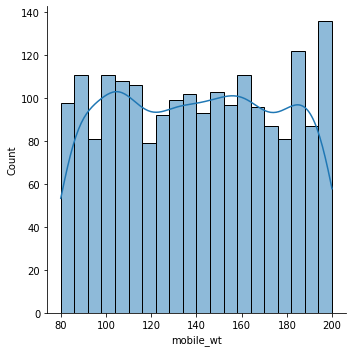

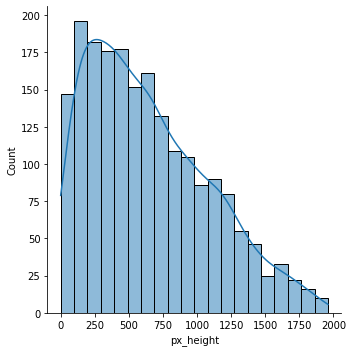

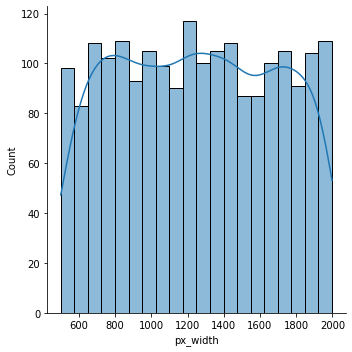

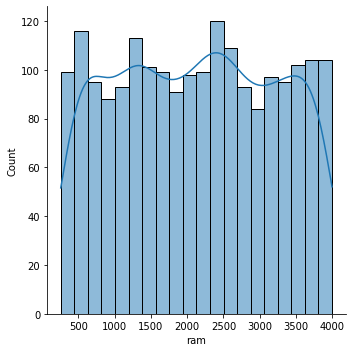

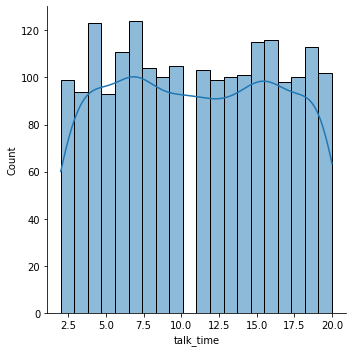

In [86]:
sns.displot(ds['battery_power'],kde=True,bins=20)
plt.show()

sns.displot(ds['clock_speed'],kde=True,bins=20)
plt.show()

sns.displot(ds['int_memory'],kde=True,bins=20)
plt.show()

sns.displot(ds['m_dep'],kde=True,bins=20)
plt.show()

sns.displot(ds['mobile_wt'],kde=True,bins=20)
plt.show()

sns.displot(ds['px_height'],kde=True,bins=20)
plt.show()

sns.displot(ds['px_width'],kde=True,bins=20)
plt.show()

sns.displot(ds['ram'],kde=True,bins=20)
plt.show()

sns.displot(ds['talk_time'],kde=True,bins=20)
plt.show()

In [87]:
ds=pd.read_csv('train.csv')
ds

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


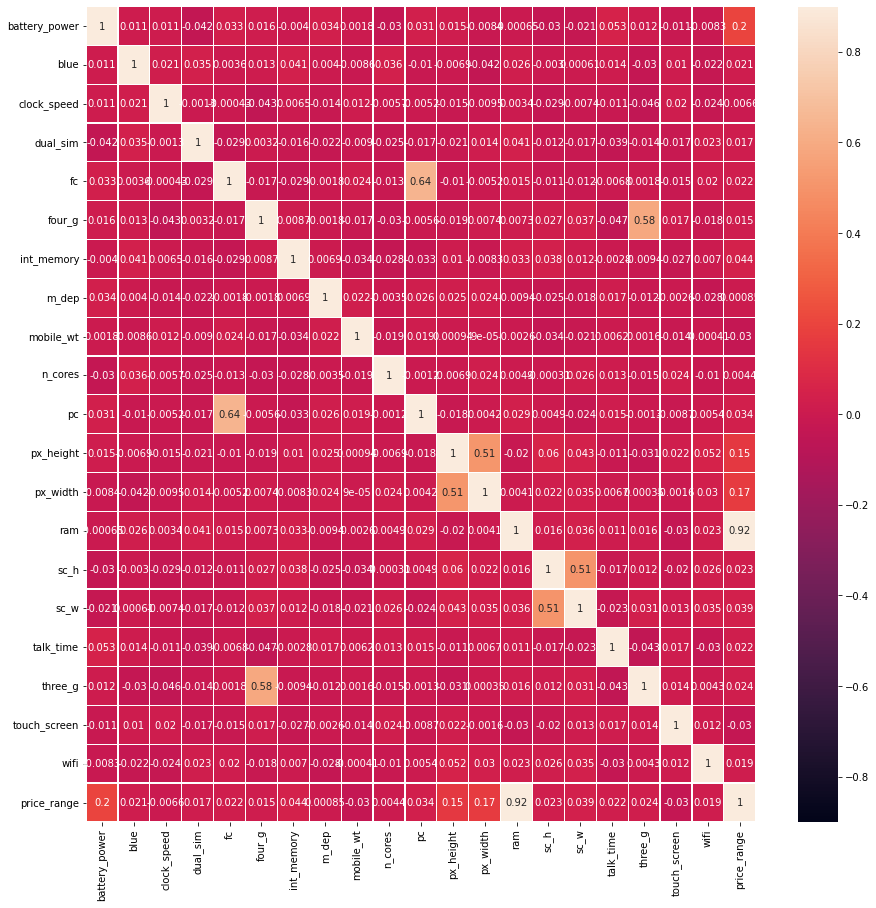

In [88]:
corr=ds.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot= True,vmin=-.9,vmax=.9,linewidths=.2,linecolor='white')
plt.show()

In [89]:
def correlation(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [90]:
corr_features = correlation(ds, 0.85)
print("Length of corr_features : ",len(set(corr_features)))
print("Corr_features : ",corr_features)

Length of corr_features :  1
Corr_features :  {'price_range'}


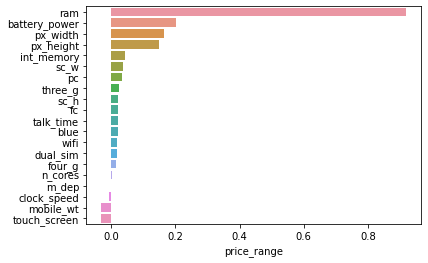

In [91]:
correlation = corr['price_range'].sort_values(ascending = False)
correlate = correlation[1:]
c_index = correlate.index
sns.barplot(correlate,c_index)

[0.06210076 0.01945996 0.03321707 0.01901894 0.03136604 0.01693392
 0.03487731 0.03315164 0.03665671 0.03299074 0.03370161 0.0468853
 0.04878345 0.39743485 0.03355554 0.03377197 0.03417105 0.01443988
 0.01773194 0.01975132]


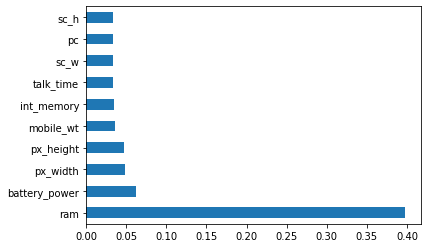

In [92]:
X = ds.iloc[:,0:20]      #X has all features except 'price_range'
y = ds.iloc[:,-1]        #y has only 'price_range'
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

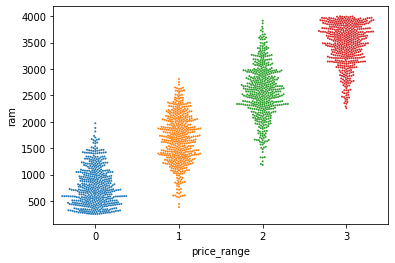

In [93]:
sns.swarmplot(x="price_range",y="ram",data=ds,size=2)
plt.show()

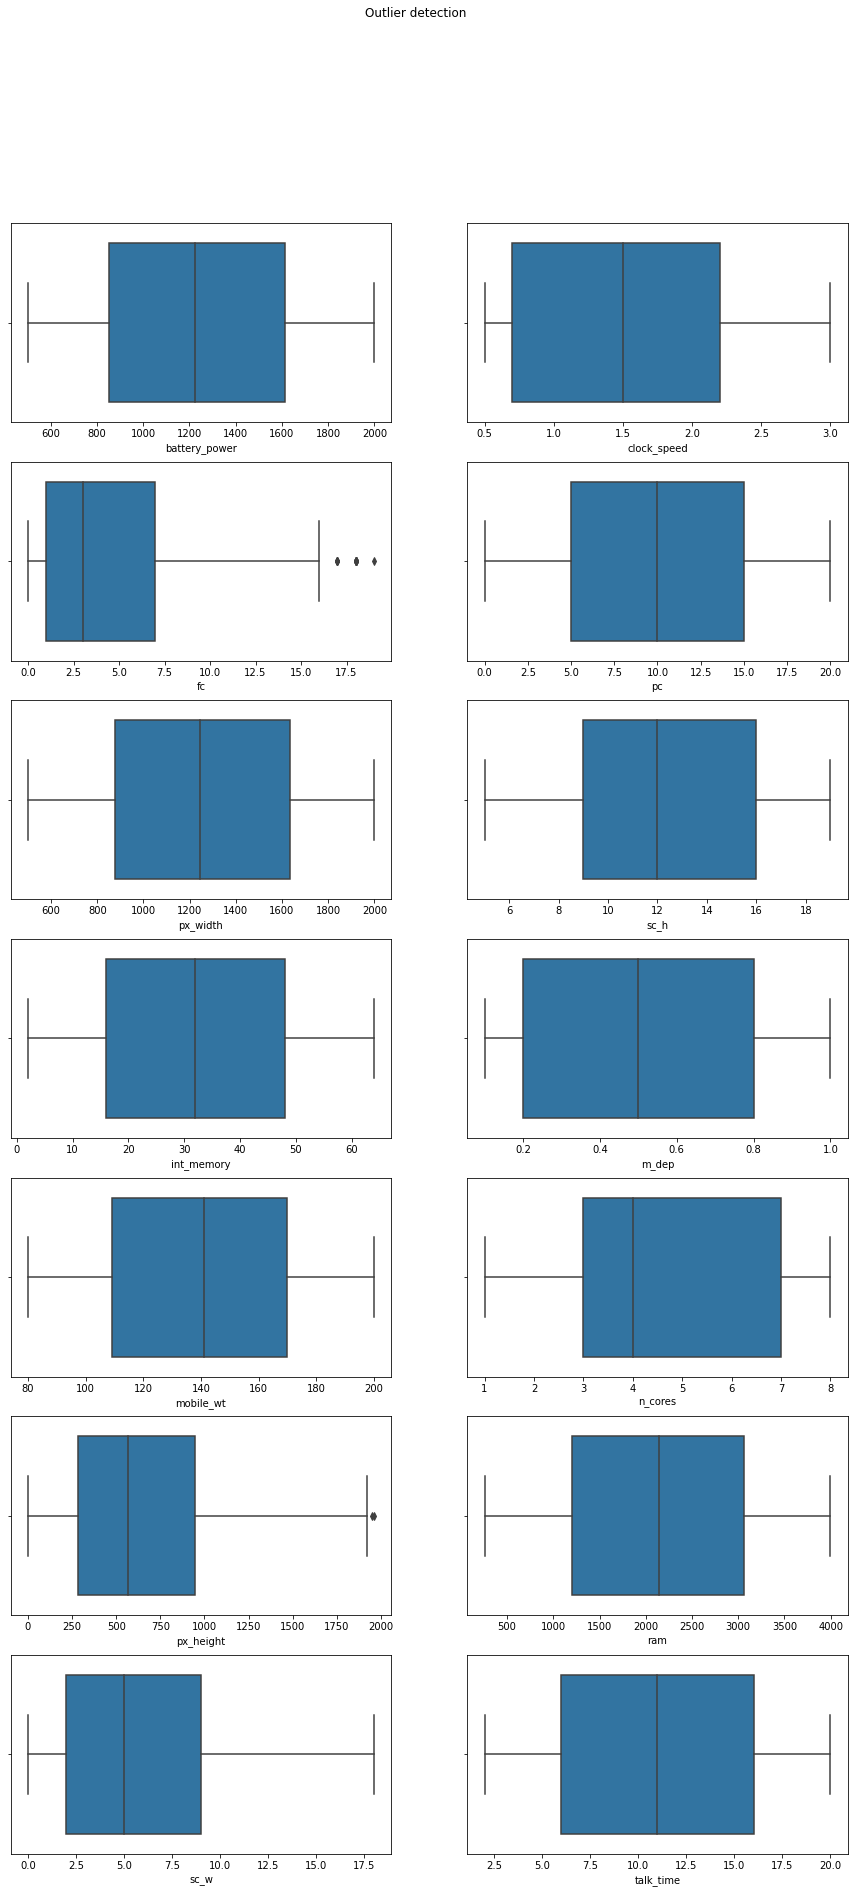

In [94]:
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(15,30))
fig .suptitle("Outlier detection")
sns.boxplot(x=ds['battery_power'],ax=ax[0,0])
sns.boxplot(x=ds['clock_speed'],ax=ax[0,1])
sns.boxplot(x=ds['fc'],ax=ax[1,0])
sns.boxplot(x=ds['pc'],ax=ax[1,1])
sns.boxplot(x=ds['px_width'],ax=ax[2,0])
sns.boxplot(x=ds['sc_h'],ax=ax[2,1])
sns.boxplot(x=ds['int_memory'],ax=ax[3,0])
sns.boxplot(x=ds['m_dep'],ax=ax[3,1])
sns.boxplot(x=ds['mobile_wt'],ax=ax[4,0])
sns.boxplot(x=ds['n_cores'],ax=ax[4,1])
sns.boxplot(x=ds['px_height'],ax=ax[5,0])
sns.boxplot(x=ds['ram'],ax=ax[5,1])
sns.boxplot(x=ds['sc_w'],ax=ax[6,0])
sns.boxplot(x=ds['talk_time'],ax=ax[6,1])
plt.show()

In [95]:
print("Position of outlier in fc :\n",np.where(ds['fc']>15.0))
print("\nPosition of outlier in px_height :\n",np.where(ds['px_height']>1750))

Position of outlier in fc :
 (array([  31,   35,   38,   95,  157,  169,  206,  226,  229,  288,  300,
        302,  305,  351,  372,  401,  501,  545,  564,  584,  745,  771,
       1007, 1062, 1196, 1387, 1406, 1416, 1447, 1456, 1549, 1554, 1594,
       1640, 1665, 1693, 1705, 1707, 1788, 1880, 1882, 1888]),)

Position of outlier in px_height :
 (array([ 107,  148,  260,  274,  292,  305,  443,  483,  520,  662,  770,
        873,  894,  988, 1017, 1163, 1353, 1397, 1473, 1528, 1532, 1615,
       1695, 1734, 1771, 1827]),)


In [96]:
def outlier_det(col_name,data):
    Q1=np.percentile(data[col_name],25,interpolation='midpoint')
    Q2=np.percentile(data[col_name],50,interpolation='midpoint')
    Q3=np.percentile(data[col_name],75,interpolation='midpoint')
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    new_df = data[(data[col_name] < upper) & (data[col_name] > lower)]
    return new_df

In [97]:
ax=['fc','px_height']
print(f"Dataset size before removing outliers = {ds.shape[0]}")
for i in ax:
    ds=outlier_det(i,ds)
print(f"Dataset size after removing outliers = {ds.shape[0]}")

Dataset size before removing outliers = 2000
Dataset size after removing outliers = 1956


In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [99]:
ds=ds.iloc[:,:21]
X=ds.iloc[:,:-1]      #X contains all features except 'price_range'
y=ds.iloc[:,-1]       #y contain only 'price_range'

sc = StandardScaler()
X=sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Logistic Regression

In [100]:
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred_log = log.predict(X_test)
print("Training score of Logistic Regression is : {}".format(log.score(X_train,y_train)*100))
acc_log=accuracy_score(y_test,y_pred_log)*100
print("Accuracy Score : {}%".format(acc_log))
print("Confusion matrix : \n{}".format(confusion_matrix(y_test,y_pred_log)))
print("Classification report is : \n{}".format(classification_report(y_test,y_pred_log)))

Training score of Logistic Regression is : 97.75051124744377
Accuracy Score : 95.29652351738241%
Confusion matrix : 
[[110   3   0   0]
 [  5 121   1   0]
 [  0   8 113   3]
 [  0   0   3 122]]
Classification report is : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       113
           1       0.92      0.95      0.93       127
           2       0.97      0.91      0.94       124
           3       0.98      0.98      0.98       125

    accuracy                           0.95       489
   macro avg       0.95      0.95      0.95       489
weighted avg       0.95      0.95      0.95       489



KNN classifier

In [101]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  classifier.fit(X_train,y_train)
  y_pred_knn=classifier.predict(X_test)
  acc_knn=accuracy_score(y_test,y_pred_knn)
  acc_values.append(acc_knn)
print("Accuracy values:\n",acc_values)
print("Maximum value among all : ",max(acc_values))

Accuracy values:
 [0.4130879345603272, 0.4867075664621677, 0.47648261758691207, 0.4785276073619632, 0.48261758691206547, 0.4948875255623722, 0.5051124744376279, 0.5173824130879345, 0.5255623721881391, 0.5194274028629857, 0.5132924335378323, 0.5378323108384458]
Maximum value among all :  0.5378323108384458


Text(0, 0.5, 'Accuracy')

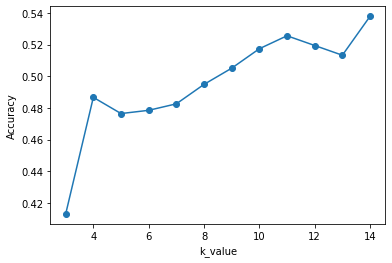

In [102]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k_value')
plt.ylabel('Accuracy')

In [103]:
knn=KNeighborsClassifier(n_neighbors=14,metric='minkowski')
knn.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)
print("Training score of KNN is: {}".format(knn.score(X_train,y_train)*100))
acc_knn=accuracy_score(y_test,y_pred_knn)*100
print("Accuracy of KNN is: {}%".format(acc_knn))
print("Confusion matrix of KNN is: \n{}".format(confusion_matrix(y_test,y_pred_knn)))
print("Classification report is : \n{}".format(classification_report(y_test,y_pred_knn)))

Training score of KNN is: 67.41649625085208
Accuracy of KNN is: 53.78323108384458%
Confusion matrix of KNN is: 
[[85 28  0  0]
 [43 53 29  2]
 [ 6 44 57 17]
 [ 0 10 47 68]]
Classification report is : 
              precision    recall  f1-score   support

           0       0.63      0.75      0.69       113
           1       0.39      0.42      0.40       127
           2       0.43      0.46      0.44       124
           3       0.78      0.54      0.64       125

    accuracy                           0.54       489
   macro avg       0.56      0.54      0.54       489
weighted avg       0.56      0.54      0.54       489



SVM linear

In [104]:
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)
print("Training score of SVM is: {}".format(svm.score(X_train,y_train)*100))
acc_svm=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of SVM is: {}%".format(acc_svm))
print("Confusion matrix of SVM is: \n{}".format(confusion_matrix(y_test,y_pred_svm)))
print("Classification report is : \n{}".format(classification_report(y_test,y_pred_svm)))

Training score of SVM is: 97.2733469665985
Accuracy of SVM is: 95.0920245398773%
Confusion matrix of SVM is: 
[[109   4   0   0]
 [  4 122   1   0]
 [  0   9 111   4]
 [  0   0   2 123]]
Classification report is : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       113
           1       0.90      0.96      0.93       127
           2       0.97      0.90      0.93       124
           3       0.97      0.98      0.98       125

    accuracy                           0.95       489
   macro avg       0.95      0.95      0.95       489
weighted avg       0.95      0.95      0.95       489



SVM polynomial

In [105]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(X_train,y_train)
y_pred_svm_poly=svm_poly.predict(X_test)
print("Training score of SVM is: {}".format(svm_poly.score(X_train,y_train)*100))
acc_svm_poly=accuracy_score(y_test,y_pred_svm_poly)*100
print("Accuracy of SVM is: {}%".format(acc_svm_poly))
print("Confusion matrix of SVM is: \n{}".format(confusion_matrix(y_test,y_pred_svm_poly)))
print("Classification report is : \n{}".format(classification_report(y_test,y_pred_svm_poly)))

Training score of SVM is: 97.75051124744377
Accuracy of SVM is: 73.00613496932516%
Confusion matrix of SVM is: 
[[90 23  0  0]
 [17 90 20  0]
 [ 2 24 89  9]
 [ 0  0 37 88]]
Classification report is : 
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       113
           1       0.66      0.71      0.68       127
           2       0.61      0.72      0.66       124
           3       0.91      0.70      0.79       125

    accuracy                           0.73       489
   macro avg       0.75      0.73      0.74       489
weighted avg       0.75      0.73      0.73       489



SVM radial

In [106]:
svm1=SVC(kernel='rbf')
svm1.fit(X_train,y_train)
y_pred_svm1=svm.predict(X_test)
print("Training score of SVM is: {}".format(svm1.score(X_train,y_train)*100))
acc_svm1=accuracy_score(y_test,y_pred_svm1)*100
print("Accuracy of SVM is: {}%".format(acc_svm1))
print("Confusion matrix of SVM is: \n{}".format(confusion_matrix(y_test,y_pred_svm1)))
print("Classification report is : \n{}".format(classification_report(y_test,y_pred_svm1)))

Training score of SVM is: 99.1138377641445
Accuracy of SVM is: 95.0920245398773%
Confusion matrix of SVM is: 
[[109   4   0   0]
 [  4 122   1   0]
 [  0   9 111   4]
 [  0   0   2 123]]
Classification report is : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       113
           1       0.90      0.96      0.93       127
           2       0.97      0.90      0.93       124
           3       0.97      0.98      0.98       125

    accuracy                           0.95       489
   macro avg       0.95      0.95      0.95       489
weighted avg       0.95      0.95      0.95       489



Adaboost classifier

In [107]:
adb=AdaBoostClassifier()
adb.fit(X_train,y_train)
y_pred_adb = adb.predict(X_test)
print("Training score of Ada Boost Classifier is : {}".format(adb.score(X_train,y_train)*100))
acc_adb=accuracy_score(y_test,y_pred_adb)*100
print("Accuracy of Ada Boost Classifier is : {}%".format(acc_adb))
print("Confusion matrix of Ada Boost Classifier is : \n{}".format(confusion_matrix(y_test,y_pred_adb)))
print("Classification report is : \n{}".format(classification_report(y_test,y_pred_adb)))

Training score of Ada Boost Classifier is : 68.77982276755283
Accuracy of Ada Boost Classifier is : 62.372188139059304%
Confusion matrix of Ada Boost Classifier is : 
[[ 68  45   0   0]
 [  2 116   9   0]
 [  0  51  67   6]
 [  0   1  70  54]]
Classification report is : 
              precision    recall  f1-score   support

           0       0.97      0.60      0.74       113
           1       0.54      0.91      0.68       127
           2       0.46      0.54      0.50       124
           3       0.90      0.43      0.58       125

    accuracy                           0.62       489
   macro avg       0.72      0.62      0.63       489
weighted avg       0.71      0.62      0.62       489



XG boost classifier

In [108]:
xg=XGBClassifier()
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
print("Training score of XGB Classifier is : {}".format(xg.score(X_train,y_train)*100))
acc_xg=accuracy_score(y_test,y_pred_xg)*100
print("Accuracy of XGB Classifier is: {}".format(acc_xg))
print("Confusion matrix of XGB Classifier is: \n{}".format(confusion_matrix(y_test,y_pred_xg)))
print("Classification report is : \n{}".format(classification_report(y_test,y_pred_xg)))

Training score of XGB Classifier is : 99.31833674164963
Accuracy of XGB Classifier is: 90.79754601226993
Confusion matrix of XGB Classifier is: 
[[108   5   0   0]
 [  8 115   4   0]
 [  0  11 108   5]
 [  0   0  12 113]]
Classification report is : 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       113
           1       0.88      0.91      0.89       127
           2       0.87      0.87      0.87       124
           3       0.96      0.90      0.93       125

    accuracy                           0.91       489
   macro avg       0.91      0.91      0.91       489
weighted avg       0.91      0.91      0.91       489



Gradient boost classifier

In [109]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)
print("Training score of GB Classifier is : {}".format(gb.score(X_train,y_train)*100))
acc_gb=accuracy_score(y_test,y_pred_gb)*100
print("Accuracy of GB Classifier is: {}".format(acc_gb))
print("Confusion matrix of GB Classifier is: \n{}".format(confusion_matrix(y_test,y_pred_gb)))
print("Classification report is : \n{}".format(classification_report(y_test,y_pred_gb)))

Training score of GB Classifier is : 100.0
Accuracy of GB Classifier is: 91.00204498977506
Confusion matrix of GB Classifier is: 
[[108   5   0   0]
 [ 12 109   6   0]
 [  0   7 112   5]
 [  0   0   9 116]]
Classification report is : 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       113
           1       0.90      0.86      0.88       127
           2       0.88      0.90      0.89       124
           3       0.96      0.93      0.94       125

    accuracy                           0.91       489
   macro avg       0.91      0.91      0.91       489
weighted avg       0.91      0.91      0.91       489



Gaussian naive bayes

In [110]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
print("Training score of GaussianNB is : {}".format(nb.score(X_train,y_train)*100))
acc_nb=accuracy_score(y_test,y_pred_nb)*100
print("Accuracy of Naive Bayes Classifier is : {}%".format(acc_nb))
print("Confusion matrix of Naive Bayes Classifier is : \n{}".format(confusion_matrix(y_test,y_pred_nb)))
print("Classification report is : \n{}".format(classification_report(y_test,y_pred_nb)))

Training score of GaussianNB is : 82.20858895705521
Accuracy of Naive Bayes Classifier is : 81.79959100204499%
Confusion matrix of Naive Bayes Classifier is : 
[[ 96  17   0   0]
 [  9 100  18   0]
 [  0  21  94   9]
 [  0   0  15 110]]
Classification report is : 
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       113
           1       0.72      0.79      0.75       127
           2       0.74      0.76      0.75       124
           3       0.92      0.88      0.90       125

    accuracy                           0.82       489
   macro avg       0.83      0.82      0.82       489
weighted avg       0.82      0.82      0.82       489



Bernouli naive bayes

In [111]:
bnb=GaussianNB()
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)
print("Training score of GaussianNB is : {}".format(bnb.score(X_train,y_train)*100))
acc_bnb=accuracy_score(y_test,y_pred_bnb)*100
print("Accuracy of Naive Bayes Classifier is : {}%".format(acc_bnb))
print("Confusion matrix of Naive Bayes Classifier is : \n{}".format(confusion_matrix(y_test,y_pred_bnb)))
print("Classification report is : \n{}".format(classification_report(y_test,y_pred_bnb)))

Training score of GaussianNB is : 82.20858895705521
Accuracy of Naive Bayes Classifier is : 81.79959100204499%
Confusion matrix of Naive Bayes Classifier is : 
[[ 96  17   0   0]
 [  9 100  18   0]
 [  0  21  94   9]
 [  0   0  15 110]]
Classification report is : 
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       113
           1       0.72      0.79      0.75       127
           2       0.74      0.76      0.75       124
           3       0.92      0.88      0.90       125

    accuracy                           0.82       489
   macro avg       0.83      0.82      0.82       489
weighted avg       0.82      0.82      0.82       489



Decision tree

In [112]:
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print("Training score of Decision Tree Classifier is : {}".format(dt.score(X_train,y_train)*100))
acc_dt=accuracy_score(y_test,y_pred_dt)*100
print("Accuracy score is : {}%".format(acc_dt))
print("Confusion matrix : \n{}".format(confusion_matrix(y_test,y_pred_dt)))
print("Classification report is : \n{}".format(classification_report(y_test,y_pred_dt)))

Training score of Decision Tree Classifier is : 100.0
Accuracy score is : 86.9120654396728%
Confusion matrix : 
[[104   9   0   0]
 [ 11 106  10   0]
 [  0  11  99  14]
 [  0   0   9 116]]
Classification report is : 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       113
           1       0.84      0.83      0.84       127
           2       0.84      0.80      0.82       124
           3       0.89      0.93      0.91       125

    accuracy                           0.87       489
   macro avg       0.87      0.87      0.87       489
weighted avg       0.87      0.87      0.87       489



Random forest classifier

In [113]:
RF=RandomForestClassifier(n_estimators=300)
RF.fit(X_train,y_train)
y_pred_RF=RF.predict(X_test)
print("Training score of Random Forest Classifier is : {}".format(RF.score(X_train,y_train)*100))
acc_rf=accuracy_score(y_test,y_pred_RF)*100
print("Accuracy of Random Forest Classifier is: {}%".format(acc_rf))
print("Confusion matrix of Random Forest Classifier is: \n{}".format(confusion_matrix(y_test,y_pred_RF)))
print("Classification report is : \n{}".format(classification_report(y_test,y_pred_RF)))

Training score of Random Forest Classifier is : 100.0
Accuracy of Random Forest Classifier is: 89.16155419222905%
Confusion matrix of Random Forest Classifier is: 
[[104   9   0   0]
 [ 12 110   5   0]
 [  0  12 106   6]
 [  0   0   9 116]]
Classification report is : 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       113
           1       0.84      0.87      0.85       127
           2       0.88      0.85      0.87       124
           3       0.95      0.93      0.94       125

    accuracy                           0.89       489
   macro avg       0.89      0.89      0.89       489
weighted avg       0.89      0.89      0.89       489



Comparison of classifiers

In [114]:
classifiers=["LogisticRegression","KNNClassifier","SVM-Linear","SVM-Poly","SVM-Radial","ADABoost","XG","GradientBoosting","GuassianNB","BernoulliNB","DecisionTree","RandomForest"
]
accuracy_=[acc_log,acc_knn,acc_svm,acc_svm_poly,acc_svm1,acc_adb,acc_xg,acc_gb,acc_nb,acc_bnb,acc_dt,acc_rf]
df_ac=pd.DataFrame({'Model':classifiers,"Accuracy":accuracy_})
px.histogram(data_frame=df_ac,x="Model",y="Accuracy",color=classifiers)

Logistic regression seems to be the best model

K Fold Validation

In [64]:
K_Fold = KFold(n_splits=10)
abc=[]
Acc = []
Classifiers = ["Logistic Regression","KNNClassifier","SVM-Linear","SVM-Poly","SVM-Radial","ADABoost","XG","GradientBoosting","GuassianNB","BernoulliNB","DecisionTree","RandomForest"
]
Models = [LogisticRegression(),KNeighborsClassifier(n_neighbors=7,metric='minkowski'),SVC(kernel='linear'),SVC(kernel='poly',degree=3),SVC(kernel='rbf'),AdaBoostClassifier(),XGBClassifier(),GradientBoostingClassifier(),GaussianNB(),GaussianNB(),DecisionTreeClassifier(criterion="entropy"),RandomForestClassifier(n_estimators=300)]
for i in Models:
    model = i
    CV_Result = cross_val_score(model, X_train, y_train, cv=K_Fold, scoring="accuracy")
    abc.append(CV_Result.mean())
    Acc.append(CV_Result)

CV_ModelData = pd.DataFrame(abc, index=Classifiers)
CV_ModelData.columns = ["CV Mean"]
CV_ModelData

,CV Mean
Logistic Regression,0.948197
KNNClassifier,0.510605
SVM-Linear,0.944106
SVM-Poly,0.762776
SVM-Radial,0.879401
ADABoost,0.605834
XG,0.899781
GradientBoosting,0.898434
GuassianNB,0.801640
BernoulliNB,0.801640


SVM linear is the best model

In [115]:
data=pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [116]:
data["rank_by_price"] = data["price_range"].rank() #RANK BY PRICE RANGE
dataset = data
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5


In [117]:
dataset.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,529,1082,15,5,10,1,0,1,0,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,1495,808,11,7,5,1,1,0,0,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,812,776,7,6,8,0,0,0,0,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1513,286,14,4,17,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1040,3863,17,12,9,1,1,1,3,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,1960,3506,14,5,12,1,1,0,3,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,864,3984,17,14,8,1,1,1,3,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1977,3458,9,4,9,1,1,1,3,1750.5


In [118]:
data=pd.read_csv('train.csv') #ranking all the features
rankedset=data.rank()
rankedset.sort_values(by=["price_range"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,657.5,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,189.0,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,329.5,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,288.0,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1231.5,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,455.0,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,419.5,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,1134.0,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1371.0,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5


In [119]:
rd = data
rd["rank_by_price"] = rd["price_range"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_battery"] = rd["battery_power"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_blueooth"] = rd["blue"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_clockspeed"] = rd["clock_speed"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_DualSIM"] = rd["dual_sim"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_fc"] = rd["fc"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_4G"] = rd["four_g"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_InternalMemory"] = rd["int_memory"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_mdep"] = rd["m_dep"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_weight"] = rd["mobile_wt"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_ncores"] = rd["n_cores"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_pc"] = rd["pc"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_height"] = rd["px_height"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_width"] = rd["px_width"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_ram"] = rd["ram"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_sch"] = rd["sc_h"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_scw"] = rd["sc_w"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_talktime"] = rd["talk_time"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_3G"] = rd["three_g"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_touchscreen"] = rd["touch_screen"].rank(ascending=False,axis=0,method="dense")
rd["rank_by_wifi"] = rd["wifi"].rank(ascending=False,axis=0,method="dense")
rd.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,19.0,1119.0,923.0,599.0,11.0,12.0,2.0,2.0,2.0,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,15.0,399.0,10.0,564.0,3.0,16.0,14.0,1.0,1.0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,15.0,175.0,208.0,578.0,9.0,17.0,12.0,1.0,1.0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,12.0,202.0,155.0,507.0,4.0,11.0,10.0,1.0,2.0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,7.0,209.0,592.0,1063.0,12.0,17.0,6.0,1.0,1.0,2.0


In [120]:
RankedDataset = rd.iloc[:,21:]
RankedDataset #final ranked dataset

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,3.0,839.0,2.0,9.0,2.0,19.0,2.0,58.0,5.0,13.0,...,19.0,1119.0,923.0,599.0,11.0,12.0,2.0,2.0,2.0,1.0
1,2.0,712.0,1.0,26.0,1.0,20.0,1.0,12.0,4.0,65.0,...,15.0,399.0,10.0,564.0,3.0,16.0,14.0,1.0,1.0,2.0
2,2.0,1046.0,1.0,26.0,1.0,18.0,1.0,24.0,2.0,56.0,...,15.0,175.0,208.0,578.0,9.0,17.0,12.0,1.0,1.0,2.0
3,2.0,1006.0,1.0,6.0,2.0,20.0,2.0,55.0,3.0,70.0,...,12.0,202.0,155.0,507.0,4.0,11.0,10.0,1.0,2.0,2.0
4,3.0,140.0,1.0,19.0,2.0,7.0,1.0,21.0,5.0,60.0,...,7.0,209.0,592.0,1063.0,12.0,17.0,6.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,878.0,1.0,26.0,1.0,20.0,1.0,63.0,3.0,95.0,...,7.0,198.0,87.0,1382.0,7.0,15.0,2.0,1.0,1.0,2.0
1996,2.0,30.0,1.0,5.0,1.0,20.0,2.0,26.0,9.0,14.0,...,18.0,392.0,29.0,830.0,9.0,9.0,5.0,1.0,1.0,1.0
1997,1.0,67.0,2.0,22.0,1.0,19.0,1.0,29.0,4.0,93.0,...,18.0,421.0,275.0,404.0,11.0,18.0,16.0,1.0,1.0,2.0
1998,4.0,362.0,2.0,22.0,2.0,16.0,1.0,19.0,10.0,56.0,...,16.0,854.0,989.0,1296.0,2.0,9.0,2.0,1.0,1.0,1.0


In [121]:
price=rd[["price_range","rank_by_price"]]
price.drop_duplicates("price_range")

,price_range,rank_by_price
0,1,3.0
1,2,2.0
6,3,1.0
7,0,4.0


In [122]:
import pickle #saving trained model

In [123]:
filename='trained_model.sav'
pickle.dump(svm,open(filename,'wb'))

In [124]:
#loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [125]:
input_data=(1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0)
input_array=np.array(input_data)
input_reshape=input_array.reshape(1,-1)
prediction=svm.predict(input_reshape)
if (prediction[0]==0):
  print("Ranking : 4")
elif (prediction[0]==1):
  print("Ranking : 3")
elif (prediction[0]==2):
  print("Ranking : 2")
else:
  print("Ranking : 1")

Ranking : 1


In [126]:
input_data=(1021,1,1,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0)
input_array=np.array(input_data)
input_reshape=input_array.reshape(1,-1)
prediction=loaded_model.predict(input_reshape)
if (prediction[0]==0):
  print("Ranking : 4")
elif (prediction[0]==1):
  print("Ranking : 3")
elif (prediction[0]==2):
  print("Ranking : 2")
else:
  print("Ranking : 1")

Ranking : 1
